## Machine Learning HW1 (ML_SP24_HW1) 
### Due Date: 2/29 23:59 pm


In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This homework is on using all you have learned so far in model building to build a Linear Regression for a numerical target variables as well as a classfication problem.

#### There are 2 parts in this homework. Make sure you follow the instructions and the proper model building workflow

### Part 1 Predicting Home Price

#### First load the data set

In [531]:
housing = pd.read_csv("data/USA_housing2.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [532]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5003.000000,5002.000000,5003.000000,5003.000000,5003.000000,5.003000e+03
mean,68585.762026,5.975830,7.000637,3.981657,36168.940312,1.232093e+06
std,10660.383823,0.996155,1.344414,1.233941,9925.245204,3.530146e+05
min,17796.631190,-1.000000,3.236194,2.000000,172.610686,1.593866e+04
25%,61479.919570,5.322274,6.299576,3.140000,29406.506985,9.977230e+05
50%,68805.020730,5.970429,7.003188,4.050000,36204.711140,1.232872e+06
75%,75784.342190,6.650623,7.666668,4.490000,42875.237175,1.470754e+06
max,107701.748400,9.519088,70.100000,6.500000,69621.713380,2.469066e+06


***Follow the standard proper way of building a model and in particular,***

1. Perform EDA on this dataset (check outliers and null)
2. Use Scatter plots and correlation to identify the most important variable 
3. Build a one-factor Linear Regression model with that feature
4. Print out the model performance metrics (MSE, R-square).
5. Plot your best-fitted line on top of the data.
6. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
7. Add another variable to build a 2-factors model. Explain your reason why you choose that variable.
8. Comment on your results

In [533]:
housing.isna().sum()

Income                  0
HouseAge                1
NumberOfRooms           0
AreaNumberOfBedrooms    0
Population              0
Price                   0
Address                 0
dtype: int64

In [534]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

***Type your code and answers below***

In [535]:
# copy it to df variable for convenient
df = housing
df.shape

(5003, 7)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                5003 non-null   float64
 1   HouseAge              5002 non-null   float64
 2   NumberOfRooms         5003 non-null   float64
 3   AreaNumberOfBedrooms  5003 non-null   float64
 4   Population            5003 non-null   float64
 5   Price                 5003 non-null   float64
 6   Address               5003 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.7+ KB


In [537]:
df.isna().sum()

Income                  0
HouseAge                1
NumberOfRooms           0
AreaNumberOfBedrooms    0
Population              0
Price                   0
Address                 0
dtype: int64

In [538]:
df[df['HouseAge'].isnull()]

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
5002,55510.5818,NaN,8.0,4.07,46501.2838,1298950.48,"Unknown street, Philadephia, PA 17371"


#### It would be better to drop the NaN since there is only one missting value

In [539]:
df = df.dropna(axis=0)

In [540]:
df.shape

(5002, 7)

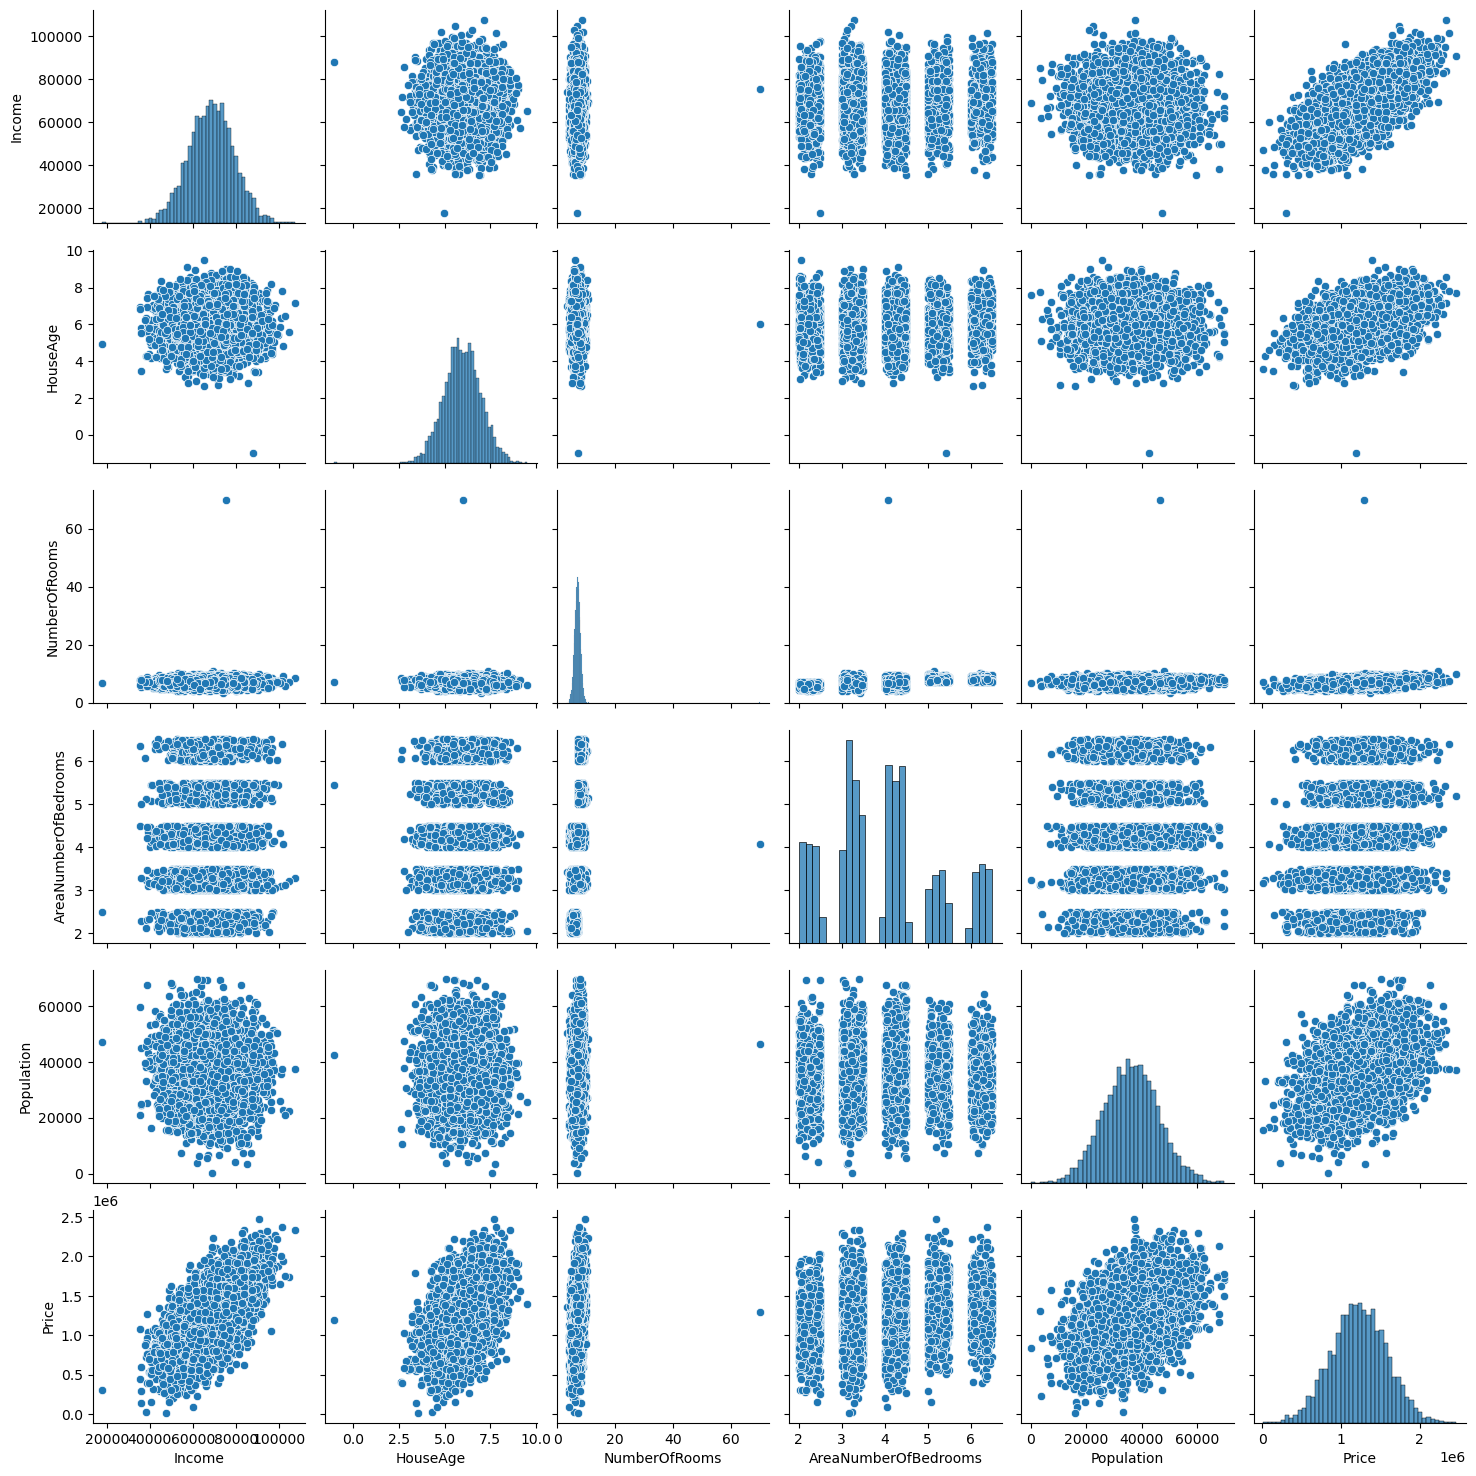

In [541]:
sns.pairplot(df)
plt.show()

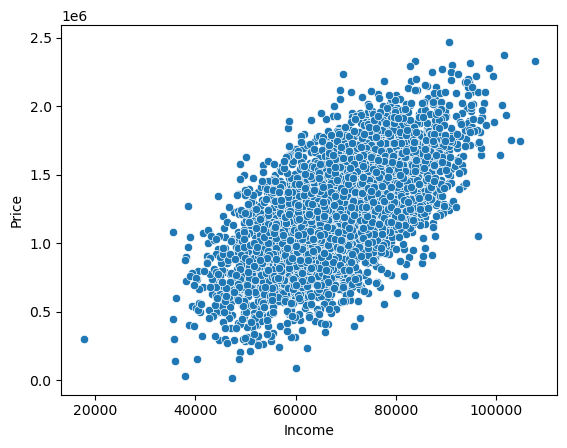

In [542]:
sns.scatterplot(data=df, y='Price', x='Income')
plt.show()

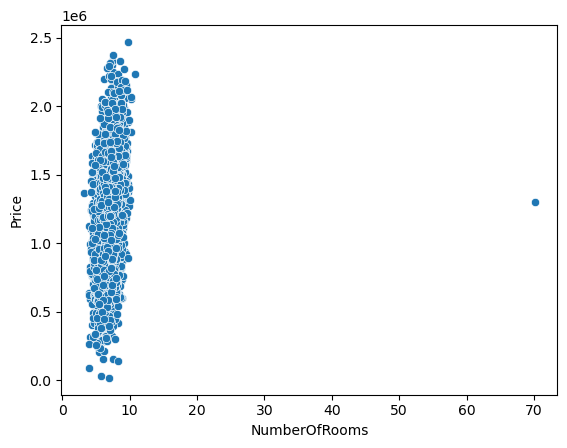

In [543]:
sns.scatterplot(data=df, y='Price', x='NumberOfRooms')
plt.show()

In [544]:
df['NumberOfRooms'].describe()

count    5002.000000
mean        7.000438
std         1.344474
min         3.236194
25%         6.299460
50%         7.003064
75%         7.666328
max        70.100000
Name: NumberOfRooms, dtype: float64

In [545]:
def box_plot_all(df):
    for col in df.select_dtypes(exclude='object').columns:
        if col != 'Price':  # excluding price becasue it is our target
            sns.boxplot(data=df[col])

            # Calculate mean, Q1, and Q3
            mean_val = df[col].mean()
            q1 = np.percentile(df[col], 25)
            q3 = np.percentile(df[col], 75)

            # mean, Q1, and Q3 levels to the plot
            plt.axhline(mean_val, color='r', linestyle='--', label='Mean')
            plt.axhline(q1, color='g', linestyle='--', label='Q1')
            plt.axhline(q3, color='b', linestyle='--', label='Q3')

            plt.title(f'Box Plot of {col}')
            plt.legend()
            plt.show()

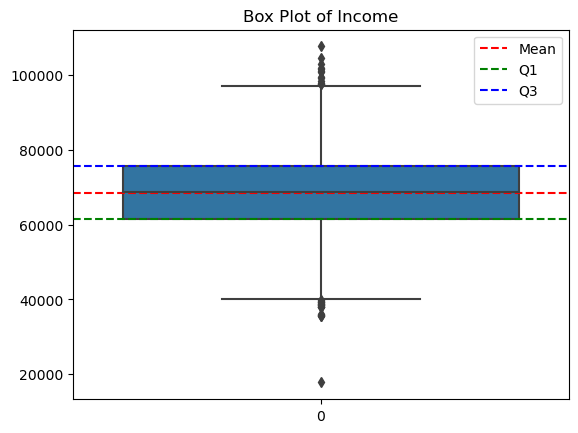

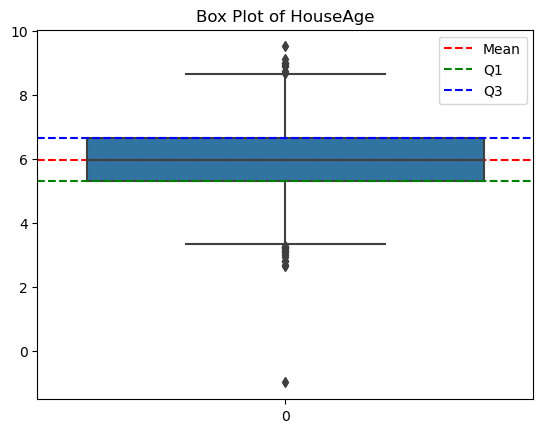

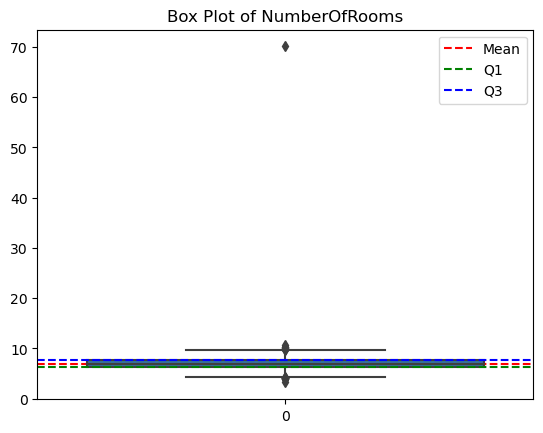

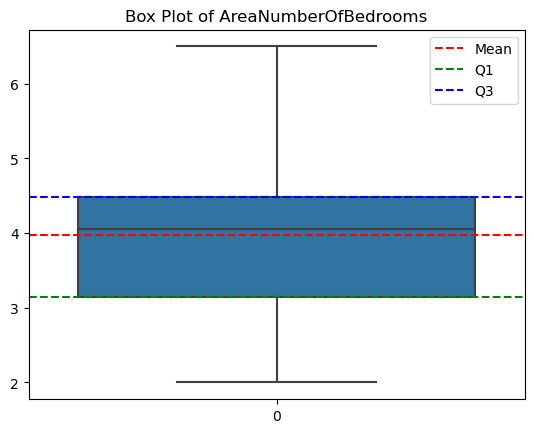

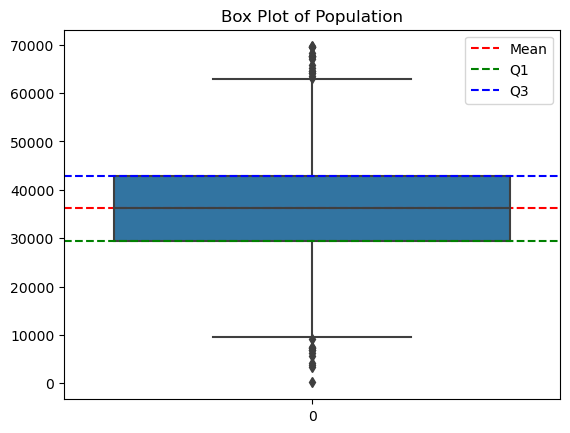

In [546]:
box_plot_all(df)

#### I think for this data we can remove all the value that is outliner since they are less than 100. also they do not affect highly

In [547]:
filtered_outlier_using_IQR_df = df.copy()

for col in df.select_dtypes(exclude='object').columns:
    if col != 'Price':  # excluding price becasue it is our target
        mean_val = df[col].mean()
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        filtered_outlier_using_IQR_df = filtered_outlier_using_IQR_df[(filtered_outlier_using_IQR_df[col] >= Q1 - 1.5 * IQR) &
                                                                      (filtered_outlier_using_IQR_df[col] <= Q3 + 1.5 * IQR)]

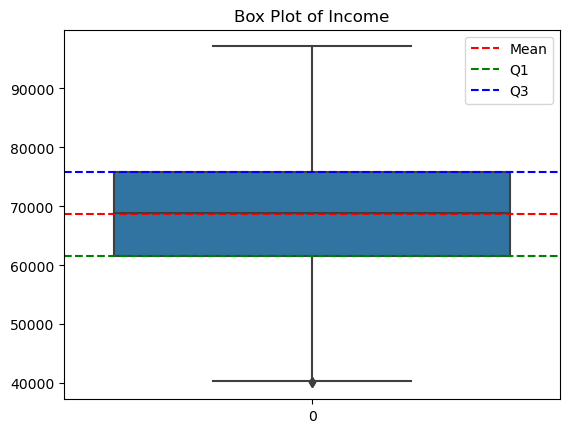

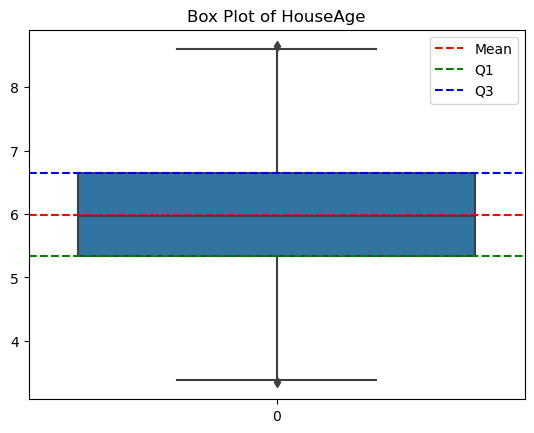

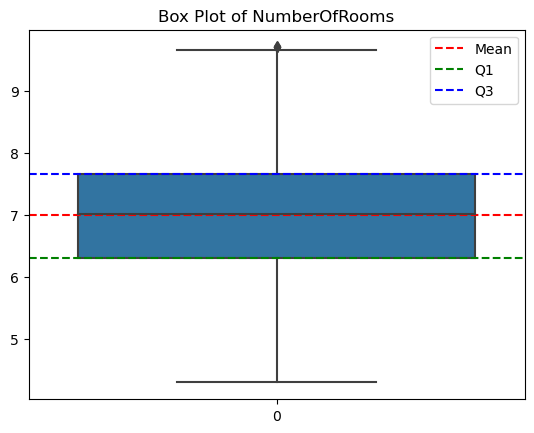

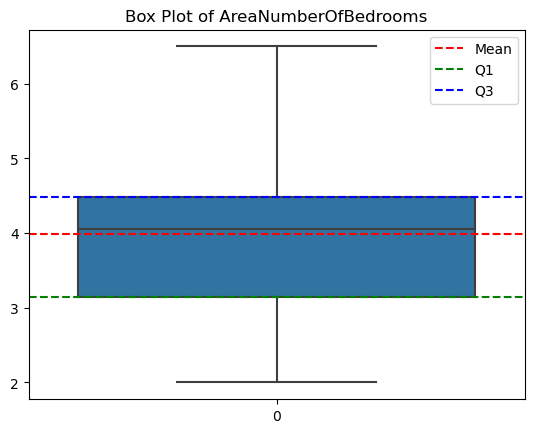

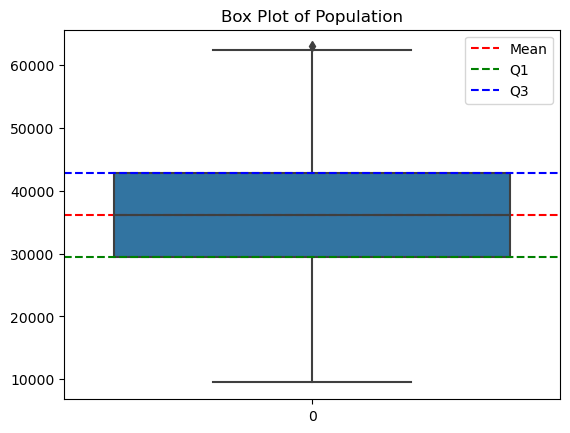

In [548]:
box_plot_all(filtered_outlier_using_IQR_df)

In [549]:
print(
    f'Total number of outliner dropped: {df.shape[0] - filtered_outlier_using_IQR_df.shape[0]}')

Total number of outliner dropped: 112


In [550]:
filtered_outlier_using_IQR_df.select_dtypes(
    exclude='object').corr().style.background_gradient()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.008328,-0.011942,0.016757,-0.002951,0.640681
HouseAge,-0.008328,1.000000,-0.011090,0.004593,-0.015865,0.449464
NumberOfRooms,-0.011942,-0.011090,1.000000,0.467243,0.003048,0.334955
AreaNumberOfBedrooms,0.016757,0.004593,0.467243,1.000000,-0.020739,0.171421
Population,-0.002951,-0.015865,0.003048,-0.020739,1.000000,0.412223
Price,0.640681,0.449464,0.334955,0.171421,0.412223,1.000000


In [551]:
print(f'1st: Price and Income has the best correlation of 0.640681')
print(f'2nd: Price and 0.449464 has the second best correlation  of 0.449464')

1st: Price and Income has the best correlation of 0.640681
2nd: Price and 0.449464 has the second best correlation  of 0.449464


### Model One 

Income VS Price


X: Income


Target: price 

In [552]:
X = filtered_outlier_using_IQR_df['Income']
y = filtered_outlier_using_IQR_df['Price']

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

(3912,)
(978,)


In [554]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)

(3912, 1)
(978, 1)


In [555]:
# normalization
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [556]:
print(X_train.shape)
print(y_train.shape)

(3912, 1)
(3912,)


In [557]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print(f'Bias: {model_1.intercept_}')
print("Coefficients: "+str(model_1.coef_))


y_train_pred = model_1.predict(X_train)


mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_train, y_train_pred)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

Bias: 625344.9366980399
Coefficients: [1219751.25472647]
prediction for training set:
MAE is: 212545.72963201677
MSE is: 70038040520.21567
RMSE is: 264647.0111681136
R2 score is 0.4165047069079155


In [558]:
y_test_pred = model_1.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_test_pred)

print('On test')
print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

On test
prediction for testing set:
MAE is: 216004.20298082664
MSE is: 72498663563.50471
RMSE is: 269255.75864501897
R2 score is 0.3856985937966103


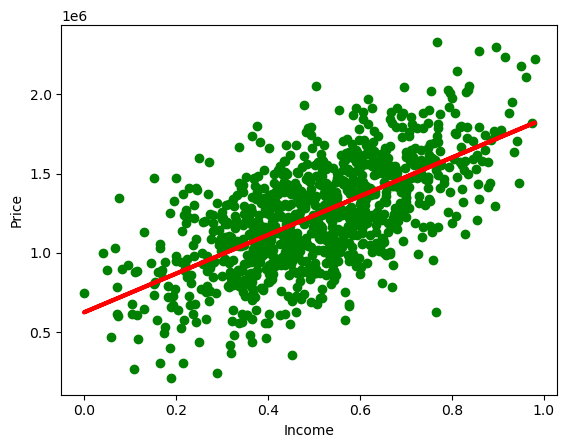

In [559]:
# Step 5: Plot your best-fitted line on top of the data
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='red', linewidth=3)
plt.xlabel('Income')
plt.ylabel('Price')
plt.show()

In [560]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_1, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation scores: [0.43187079 0.43437507 0.45977872 0.4232     0.4150545  0.37665546
 0.46258813 0.38397622 0.389597   0.36581635]
Mean Cross-validation Score: 0.4142912238345101


### Model 2: 2-factors

In [561]:
X = filtered_outlier_using_IQR_df[['Income', 'HouseAge']]
y = filtered_outlier_using_IQR_df['Price']

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(3912, 2)
(978, 2)


In [563]:
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [564]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
print(f'Bias: {model_2.intercept_}')
print("Coefficients: "+str(model_2.coef_))


y_train_pred = model_2.predict(X_train)


mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_train, y_train_pred)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

Bias: 199771.41173814132
Coefficients: [1219471.72874714  856821.2686089 ]
prediction for training set:
MAE is: 170360.14168395294
MSE is: 45383361968.04274
RMSE is: 213033.710872347
R2 score is 0.6219057829665604


In [565]:
y_test_pred = model_2.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_test_pred)

print('On test')
print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

On test
prediction for testing set:
MAE is: 174855.6920853795
MSE is: 47397739073.03547
RMSE is: 217710.218118111
R2 score is 0.5983857310980272


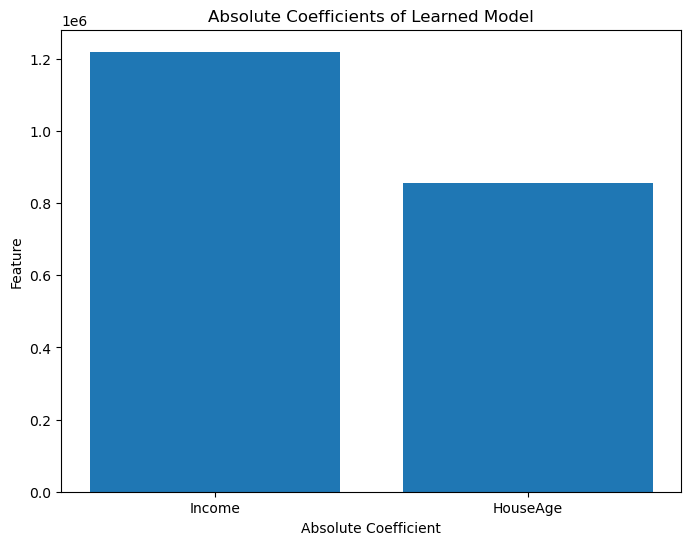

In [566]:
absolute_coefficients = np.abs(model_2.coef_)
feature_names = ['Income', 'HouseAge']  # Update with your actual feature names

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(feature_names, absolute_coefficients)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Absolute Coefficients of Learned Model')
plt.show()

###  Comment:

The reason for picking HosueAge a second variable is the correaltion between them is the highest after Income.

It seems like the R2 score in Income vs Price is 38% which is prrtty low. So there we can say we cant only realy on price. Adding HosueAge increased the R2 score to 60%. whcih is 22% decrease in error. 

### Part 2: Build a Logistic Regression model using the affairs data from


In [567]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not

#### DataSet Description

https://www.statsmodels.org/dev/datasets/generated/fair.html
    
From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [568]:
# Load the dataset
df = pd.read_csv("data/affairs_modified.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,fairly,some graduate school,occ2,husb_occ5,0.111111
1,3.0,27.0,13.0,3.0,not,some college,occ3,husb_occ4,3.230769
2,4.0,22.0,2.5,0.0,not,college,occ3,husb_occ5,1.400000
3,4.0,37.0,16.5,4.0,fairly,college,occ5,husb_occ5,0.727273
4,5.0,27.0,9.0,1.0,not,some college,occ3,husb_occ4,4.666666


In [569]:
df.describe()

,rate_marriage,age,yrs_married,children,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,0.705374
std,0.961430,6.847882,7.280120,1.433471,2.203374
min,1.000000,17.500000,0.500000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,57.599991


In [570]:
df.isnull().any()

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
dtype: bool

In [571]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(6366, 9)

Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [572]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0


# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [573]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,fairly,some graduate school,occ2,husb_occ5,0.111111,1
1,3.0,27.0,13.0,3.0,not,some college,occ3,husb_occ4,3.230769,1
2,4.0,22.0,2.5,0.0,not,college,occ3,husb_occ5,1.400000,1
3,4.0,37.0,16.5,4.0,fairly,college,occ5,husb_occ5,0.727273,1
4,5.0,27.0,9.0,1.0,not,some college,occ3,husb_occ4,4.666666,1


In [574]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6361,5.0,32.0,13.0,2.0,fairly,some graduate school,occ4,husb_occ3,0.0,0
6362,4.0,32.0,13.0,1.0,not,college,occ5,husb_occ5,0.0,0
6363,5.0,22.0,2.5,0.0,midly,some college,occ3,husb_occ1,0.0,0
6364,5.0,32.0,6.0,1.0,fairly,some college,occ3,husb_occ4,0.0,0
6365,4.0,22.0,2.5,0.0,midly,college,occ2,husb_occ4,0.0,0


In [575]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [576]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,fairly,some graduate school,occ2,husb_occ5,1
1,3.0,27.0,13.0,3.0,not,some college,occ3,husb_occ4,1
2,4.0,22.0,2.5,0.0,not,college,occ3,husb_occ5,1
3,4.0,37.0,16.5,4.0,fairly,college,occ5,husb_occ5,1
4,5.0,27.0,9.0,1.0,not,some college,occ3,husb_occ4,1


### let's group by has or no affairs rows

In [577]:
df.select_dtypes(exclude='object').groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children
had_affair,,,,
0,4.329701,28.390679,7.989335,1.238813
1,3.647345,30.537019,11.152460,1.728933


So, one can see older woman who has married longer will have higher chance of having an affairs

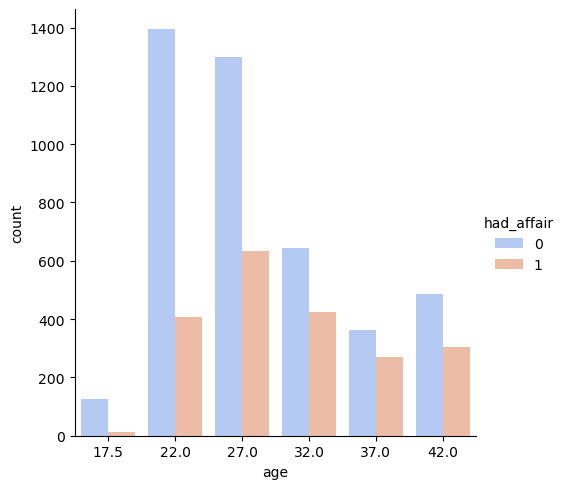

In [578]:
# Use Factorplot for age
sns.catplot(x='age', kind='count', hue='had_affair',
            data=df, palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

### Now we are ready to use this data to build model ###

***Follow the standard proper way of building a model and in particular,*** 

1. Separate numerical features from categorical features
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Decide and comment on whether you need to normalize the numerical features
4. Build a model to predict has_affairs with only the numerical features
5. Use one-hot encoding to include the categorical variable to build a second model.
6. Comment on the results of the models (whether 2nd model has improved the results etc)

***Type your code and answers below***

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   object 
 5   educ             6366 non-null   object 
 6   occupation       6366 non-null   object 
 7   occupation_husb  6366 non-null   object 
 8   had_affair       6366 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 447.7+ KB


In [580]:
numerical_features = ['rate_marriage', 'age', 'yrs_married', 'children']
numerical_df = df[numerical_features]
numerical_df.head()

,rate_marriage,age,yrs_married,children
0,3.0,32.0,9.0,3.0
1,3.0,27.0,13.0,3.0
2,4.0,22.0,2.5,0.0
3,4.0,37.0,16.5,4.0
4,5.0,27.0,9.0,1.0


In [581]:
categorical_features = ['religious', 'educ',
                        'occupation', 'occupation_husb', 'occupation_husb']
categorical_df = df[categorical_features]
categorical_df.head()

,religious,educ,occupation,occupation_husb,occupation_husb
0,fairly,some graduate school,occ2,husb_occ5,husb_occ5
1,not,some college,occ3,husb_occ4,husb_occ4
2,not,college,occ3,husb_occ5,husb_occ5
3,fairly,college,occ5,husb_occ5,husb_occ5
4,not,some college,occ3,husb_occ4,husb_occ4


### Normalization is necessary because the numerical features are on different scales

In [582]:
X_train, X_test, y_train, y_test = train_test_split(numerical_df,
                                                    df['had_affair'],
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

(5092, 4)
(1274, 4)


In [583]:
normalizer = MinMaxScaler()
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [584]:
log_reg_model_1 = LogisticRegression()
log_reg_model_1.fit(X_train, y_train)

LogisticRegression()

In [585]:
y_pred = log_reg_model_1.predict(X_test)

In [586]:
print("Logistic Regression (Numerical Features Only):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression (Numerical Features Only):
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       849
           1       0.65      0.35      0.45       425

    accuracy                           0.72      1274
   macro avg       0.69      0.63      0.63      1274
weighted avg       0.71      0.72      0.69      1274

Confusion Matrix:
[[771  78]
 [278 147]]


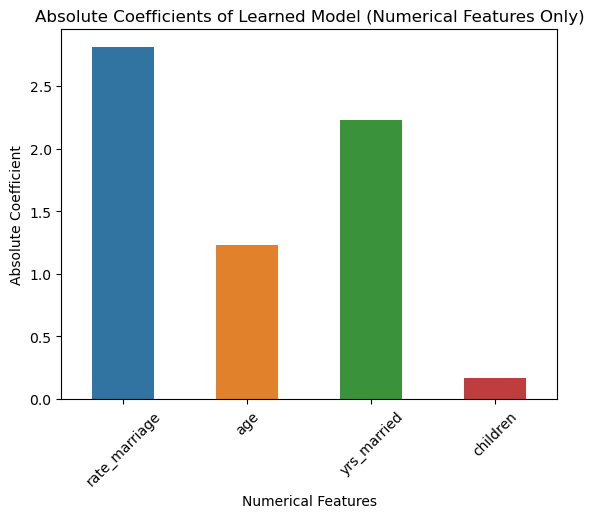

In [587]:
sns.barplot(x=numerical_features, y=np.abs(log_reg_model_1.coef_[0]), width=.5)
plt.xlabel('Numerical Features')
plt.ylabel('Absolute Coefficient')
plt.title('Absolute Coefficients of Learned Model (Numerical Features Only)')
plt.xticks(rotation=45)
plt.show()

In [588]:
encoder = OneHotEncoder(sparse=False)
categorical_encoded_df = encoder.fit_transform(categorical_df)

In [589]:
encoded_df = np.concatenate((numerical_df, categorical_encoded_df), axis=1)

In [590]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df,
                                                    df['had_affair'],
                                                    test_size=0.2,
                                                    random_state=42)

In [591]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5092, 32)
(5092,)
(1274, 32)
(1274,)


In [592]:
log_reg_model_2 = LogisticRegression()
log_reg_model_2.fit(X_train, y_train)

LogisticRegression()

In [593]:
y_pred = log_reg_model_2.predict(X_test)

In [597]:
print("Logistic Regression (With all features):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression (With all features):
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       849
           1       0.63      0.40      0.49       425

    accuracy                           0.72      1274
   macro avg       0.69      0.64      0.65      1274
weighted avg       0.71      0.72      0.70      1274

Confusion Matrix:
[[749 100]
 [256 169]]


### Comment

Comparing the two models, it seems that adding all features doesn't significantly improve the performance metrics over using only numerical features. While the precision for class 1 improves slightly, the recall decreases, indicating that the model with all features might be overfitting to some extent. Therefore, the model using only numerical features seems to be better as it maintains a balance between precision and recall for both classes.